## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=256, activation="relu")(input_layer)
    x = keras.layers.Dense(units=1024, activation="relu")(x)
    x = keras.layers.Dense(units=512, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

In [5]:
"""
Compile 模型
"""
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.SGD(lr=0.01)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               786688    
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              263168    
_________________________________________________________________
dense_7 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                5130      
Total params: 1,579,786
Trainable params: 1,579,786
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 8s 157us/step - loss: 2.1260 - accuracy: 0.2433 - val_loss: 1.9994 - val_accuracy: 0.2919
Epoch 2/500
50000/50000 [==============================] - 8s 161us/step - loss: 1.9333 - accuracy: 0.3173 - val_loss: 1.9007 - val_accuracy: 0.3117
Epoch 3/500
50000/50000 [==============================] - 9s 170us/step - loss: 1.8620 - accuracy: 0.3448 - val_loss: 1.8536 - val_accuracy: 0.3401
Epoch 4/500
50000/50000 [==============================] - 8s 160us/step - loss: 1.8125 - accuracy: 0.3634 - val_loss: 1.8063 - val_accuracy: 0.3600
Epoch 5/500
50000/50000 [==============================] - 8s 158us/step - loss: 1.7751 - accuracy: 0.3793 - val_loss: 1.7694 - val_accuracy: 0.3829
Epoch 6/500
50000/50000 [==============================] - 8s 155us/step - loss: 1.7419 - accuracy: 0.3863 - val_loss: 1.7723 - val_accuracy: 0.3690
Epoch 7/500
50000/50000 [==============================]

50000/50000 [==============================] - 9s 175us/step - loss: 1.2550 - accuracy: 0.5587 - val_loss: 1.4382 - val_accuracy: 0.4970
Epoch 56/500
50000/50000 [==============================] - 9s 177us/step - loss: 1.2476 - accuracy: 0.5599 - val_loss: 1.4868 - val_accuracy: 0.4746
Epoch 57/500
50000/50000 [==============================] - 9s 175us/step - loss: 1.2484 - accuracy: 0.5609 - val_loss: 1.4257 - val_accuracy: 0.4967
Epoch 58/500
50000/50000 [==============================] - 9s 175us/step - loss: 1.2363 - accuracy: 0.5639 - val_loss: 1.5384 - val_accuracy: 0.4579
Epoch 59/500
50000/50000 [==============================] - 9s 175us/step - loss: 1.2277 - accuracy: 0.5680 - val_loss: 1.5050 - val_accuracy: 0.4807
Epoch 60/500
50000/50000 [==============================] - 9s 175us/step - loss: 1.2244 - accuracy: 0.5692 - val_loss: 1.3997 - val_accuracy: 0.5018
Epoch 61/500
50000/50000 [==============================] - 9s 174us/step - loss: 1.2213 - accuracy: 0.5701 - val

50000/50000 [==============================] - 9s 182us/step - loss: 1.0012 - accuracy: 0.6518 - val_loss: 1.4739 - val_accuracy: 0.4928
Epoch 110/500
50000/50000 [==============================] - 9s 177us/step - loss: 0.9988 - accuracy: 0.6505 - val_loss: 1.3477 - val_accuracy: 0.5312
Epoch 111/500
50000/50000 [==============================] - 9s 179us/step - loss: 0.9917 - accuracy: 0.6528 - val_loss: 1.4180 - val_accuracy: 0.5121
Epoch 112/500
50000/50000 [==============================] - 9s 186us/step - loss: 0.9905 - accuracy: 0.6558 - val_loss: 1.4906 - val_accuracy: 0.4897
Epoch 113/500
50000/50000 [==============================] - 9s 175us/step - loss: 0.9797 - accuracy: 0.6591 - val_loss: 1.4001 - val_accuracy: 0.5211
Epoch 114/500
50000/50000 [==============================] - 9s 173us/step - loss: 0.9757 - accuracy: 0.6590 - val_loss: 1.3513 - val_accuracy: 0.5248
Epoch 115/500
50000/50000 [==============================] - 9s 175us/step - loss: 0.9762 - accuracy: 0.6602

50000/50000 [==============================] - 9s 175us/step - loss: 0.7663 - accuracy: 0.7382 - val_loss: 1.3550 - val_accuracy: 0.5441
Epoch 164/500
50000/50000 [==============================] - 9s 174us/step - loss: 0.7648 - accuracy: 0.7363 - val_loss: 1.4960 - val_accuracy: 0.5173
Epoch 165/500
50000/50000 [==============================] - 9s 176us/step - loss: 0.7575 - accuracy: 0.7414 - val_loss: 1.5802 - val_accuracy: 0.5054
Epoch 166/500
50000/50000 [==============================] - 9s 173us/step - loss: 0.7525 - accuracy: 0.7419 - val_loss: 2.0245 - val_accuracy: 0.4235
Epoch 167/500
50000/50000 [==============================] - 9s 175us/step - loss: 0.7539 - accuracy: 0.7420 - val_loss: 1.4435 - val_accuracy: 0.5259
Epoch 168/500
50000/50000 [==============================] - 9s 175us/step - loss: 0.7418 - accuracy: 0.7447 - val_loss: 1.4281 - val_accuracy: 0.5344
Epoch 169/500
50000/50000 [==============================] - 9s 175us/step - loss: 0.7371 - accuracy: 0.7458

50000/50000 [==============================] - 9s 175us/step - loss: 0.5239 - accuracy: 0.8268 - val_loss: 1.7454 - val_accuracy: 0.5059
Epoch 218/500
50000/50000 [==============================] - 9s 173us/step - loss: 0.5380 - accuracy: 0.8191 - val_loss: 1.9823 - val_accuracy: 0.4993
Epoch 219/500
50000/50000 [==============================] - 9s 173us/step - loss: 0.5317 - accuracy: 0.8210 - val_loss: 1.5692 - val_accuracy: 0.5336
Epoch 220/500
50000/50000 [==============================] - 9s 176us/step - loss: 0.5207 - accuracy: 0.8272 - val_loss: 1.7959 - val_accuracy: 0.4967
Epoch 221/500
50000/50000 [==============================] - 9s 174us/step - loss: 0.5193 - accuracy: 0.8269 - val_loss: 1.5465 - val_accuracy: 0.5401
Epoch 222/500
50000/50000 [==============================] - 9s 173us/step - loss: 0.5018 - accuracy: 0.8330 - val_loss: 1.7377 - val_accuracy: 0.5100
Epoch 223/500
50000/50000 [==============================] - 9s 173us/step - loss: 0.4964 - accuracy: 0.8380

50000/50000 [==============================] - 9s 178us/step - loss: 0.3252 - accuracy: 0.8998 - val_loss: 1.9161 - val_accuracy: 0.5063
Epoch 272/500
50000/50000 [==============================] - 9s 179us/step - loss: 0.3085 - accuracy: 0.9067 - val_loss: 1.7740 - val_accuracy: 0.5500
Epoch 273/500
50000/50000 [==============================] - 9s 176us/step - loss: 0.3162 - accuracy: 0.9071 - val_loss: 2.3262 - val_accuracy: 0.4858
Epoch 274/500
50000/50000 [==============================] - 9s 186us/step - loss: 0.3117 - accuracy: 0.9069 - val_loss: 1.8291 - val_accuracy: 0.5432
Epoch 275/500
50000/50000 [==============================] - 9s 188us/step - loss: 0.3451 - accuracy: 0.9031 - val_loss: 1.9625 - val_accuracy: 0.5192
Epoch 276/500
50000/50000 [==============================] - 9s 184us/step - loss: 0.2969 - accuracy: 0.9107 - val_loss: 1.8008 - val_accuracy: 0.5392
Epoch 277/500
50000/50000 [==============================] - 9s 174us/step - loss: 0.2816 - accuracy: 0.9166

50000/50000 [==============================] - 9s 183us/step - loss: 0.1468 - accuracy: 0.9675 - val_loss: 1.9792 - val_accuracy: 0.5512
Epoch 326/500
50000/50000 [==============================] - 9s 178us/step - loss: 0.1831 - accuracy: 0.9570 - val_loss: 1.9719 - val_accuracy: 0.5475
Epoch 327/500
50000/50000 [==============================] - 9s 176us/step - loss: 0.1368 - accuracy: 0.9731 - val_loss: 2.0898 - val_accuracy: 0.5426
Epoch 328/500
50000/50000 [==============================] - 9s 178us/step - loss: 0.1180 - accuracy: 0.9763 - val_loss: 2.1644 - val_accuracy: 0.5418
Epoch 329/500
50000/50000 [==============================] - 9s 175us/step - loss: 0.1721 - accuracy: 0.9603 - val_loss: 2.5641 - val_accuracy: 0.4842
Epoch 330/500
50000/50000 [==============================] - 9s 177us/step - loss: 0.1464 - accuracy: 0.9676 - val_loss: 2.0763 - val_accuracy: 0.5419
Epoch 331/500
50000/50000 [==============================] - 9s 178us/step - loss: 0.1090 - accuracy: 0.9796

50000/50000 [==============================] - 9s 177us/step - loss: 0.2874 - accuracy: 0.9376 - val_loss: 3.3630 - val_accuracy: 0.4547
Epoch 380/500
50000/50000 [==============================] - 9s 183us/step - loss: 0.2300 - accuracy: 0.9414 - val_loss: 2.3706 - val_accuracy: 0.5435
Epoch 381/500
50000/50000 [==============================] - 9s 177us/step - loss: 0.1307 - accuracy: 0.9741 - val_loss: 2.3167 - val_accuracy: 0.5476
Epoch 382/500
50000/50000 [==============================] - 9s 177us/step - loss: 0.1374 - accuracy: 0.9736 - val_loss: 2.3742 - val_accuracy: 0.5455
Epoch 383/500
50000/50000 [==============================] - 9s 177us/step - loss: 0.0961 - accuracy: 0.9851 - val_loss: 2.2806 - val_accuracy: 0.5507
Epoch 384/500
50000/50000 [==============================] - 9s 179us/step - loss: 0.0540 - accuracy: 0.9952 - val_loss: 2.3211 - val_accuracy: 0.5517
Epoch 385/500
50000/50000 [==============================] - 9s 175us/step - loss: 0.0514 - accuracy: 0.9957

50000/50000 [==============================] - 9s 177us/step - loss: 0.0233 - accuracy: 0.9994 - val_loss: 2.5730 - val_accuracy: 0.5502
Epoch 434/500
50000/50000 [==============================] - 9s 176us/step - loss: 0.0228 - accuracy: 0.9994 - val_loss: 2.6001 - val_accuracy: 0.5509
Epoch 435/500
50000/50000 [==============================] - 9s 177us/step - loss: 0.0225 - accuracy: 0.9994 - val_loss: 2.5940 - val_accuracy: 0.5503
Epoch 436/500
50000/50000 [==============================] - 9s 176us/step - loss: 0.0218 - accuracy: 0.9994 - val_loss: 2.6074 - val_accuracy: 0.5522
Epoch 437/500
50000/50000 [==============================] - 9s 177us/step - loss: 0.0217 - accuracy: 0.9994 - val_loss: 2.6199 - val_accuracy: 0.5497
Epoch 438/500
50000/50000 [==============================] - 9s 178us/step - loss: 0.0214 - accuracy: 0.9995 - val_loss: 2.6204 - val_accuracy: 0.5468
Epoch 439/500
50000/50000 [==============================] - 9s 180us/step - loss: 0.0208 - accuracy: 0.9996

50000/50000 [==============================] - 9s 180us/step - loss: 0.0115 - accuracy: 1.0000 - val_loss: 2.8704 - val_accuracy: 0.5503
Epoch 488/500
50000/50000 [==============================] - 9s 180us/step - loss: 0.0116 - accuracy: 0.9998 - val_loss: 2.8730 - val_accuracy: 0.5483
Epoch 489/500
50000/50000 [==============================] - 9s 183us/step - loss: 0.0113 - accuracy: 0.9999 - val_loss: 2.8726 - val_accuracy: 0.5492
Epoch 490/500
50000/50000 [==============================] - 9s 180us/step - loss: 0.0113 - accuracy: 0.9999 - val_loss: 2.8808 - val_accuracy: 0.5475
Epoch 491/500
50000/50000 [==============================] - 9s 181us/step - loss: 0.0112 - accuracy: 0.9999 - val_loss: 2.8804 - val_accuracy: 0.5501
Epoch 492/500
50000/50000 [==============================] - 9s 178us/step - loss: 0.0110 - accuracy: 1.0000 - val_loss: 2.8855 - val_accuracy: 0.5513
Epoch 493/500
50000/50000 [==============================] - 9s 179us/step - loss: 0.0109 - accuracy: 1.0000

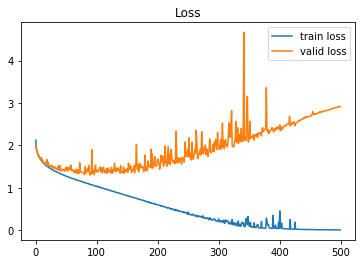

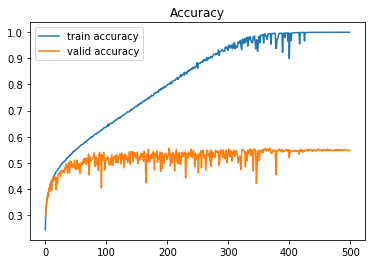

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()